In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.linalg
import scipy

print(np.__version__)
print(matplotlib.__version__)
print(scipy.__version__)

1.26.0
3.8.0
1.11.2


In [2]:
def normVector(v):
    return np.linalg.norm(v)

def __calcResidual(A, f, X):
    r = np.matrix(np.zeros((n + 1, 1)))
    r = A * X - f
    
    return r

def calcResidual(A, f, X):
    return normVector(__calcResidual(A, f, X))

In [23]:
def makePlot(y, title):
    plt.figure(figsize=(20, 10))

    x = np.arange(len(y))
    plt.plot(x, y, 'o--')
    plt.xlabel(r'$ iteration $', fontsize=16)
    plt.ylabel(r'$ ||r|| $', fontsize=16)

    #plt.yscale("log")

    plt.title(title, fontsize=16)
    plt.grid()
    #plt.legend(fontsize=16)
    plt.show()

## Non-linear equation
Chosen equation №1 from IV.12.4:

2x^2 + 5x -3 = 0

### Simple iteration method

In [4]:
def equation_sim(phi, x0, accuracy):
    rs = list()
    x = x0

    while True:
        prev_x = x
        x = phi(x)

        rs.append(abs(prev_x - x))
        if rs[-1] < accuracy:
            break

    return x, rs

In [17]:
x, rs = equation_sim(lambda x: 1/5 * (-2*(x**2) + 3), 0, 1e-8)
x

0.5000000011699167

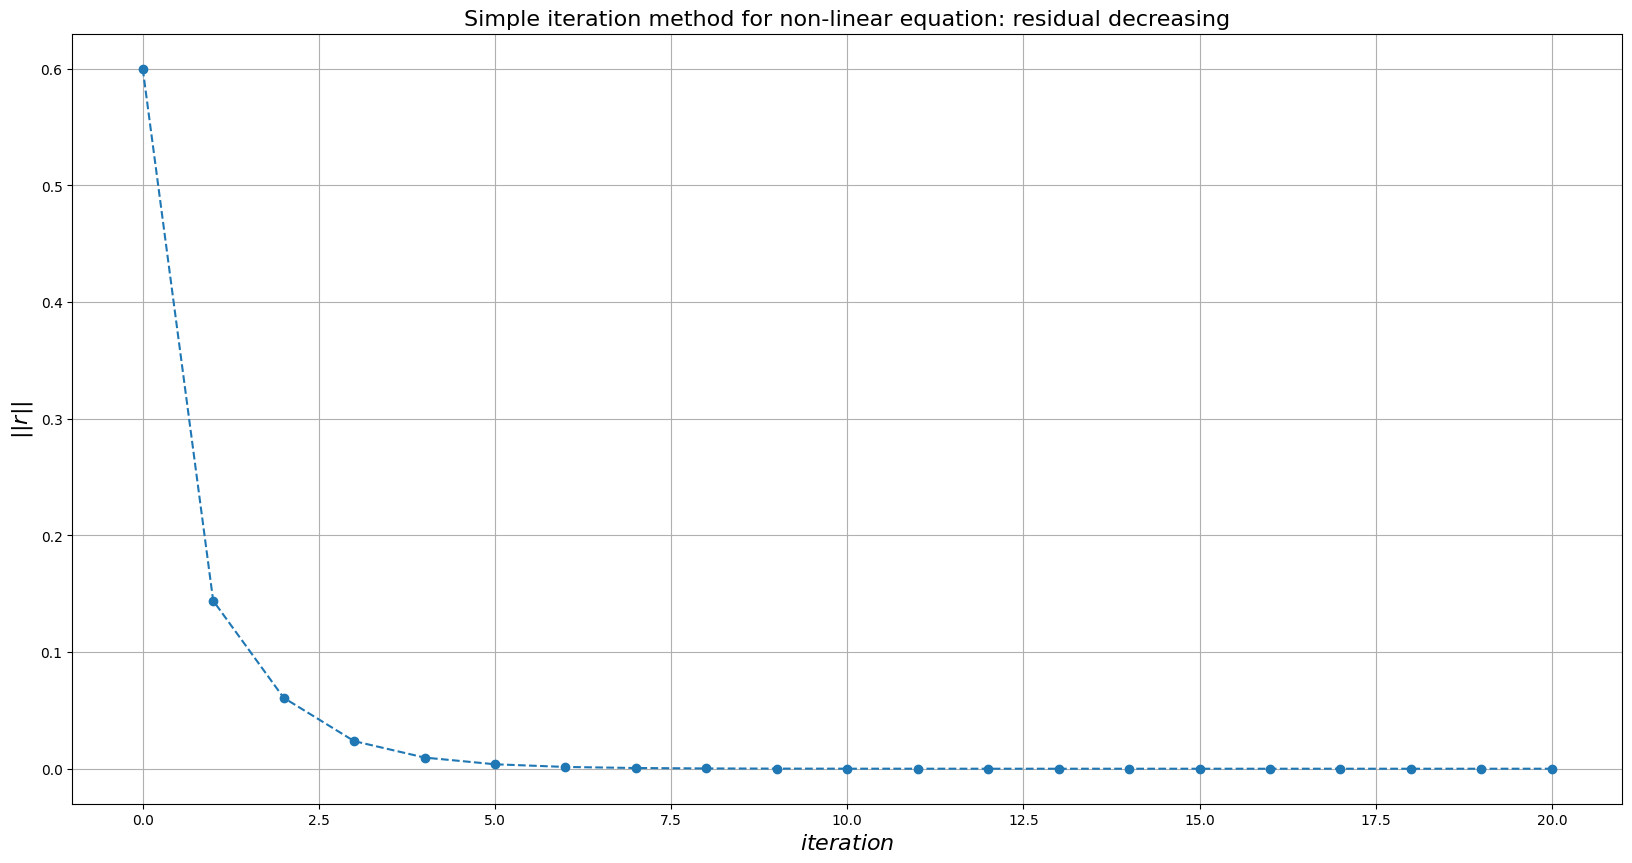

In [24]:
makePlot(rs, "Simple iteration method for non-linear equation: residual decreasing")

### Newton method

In [28]:
def equation_newton(f, x0, accuracy):
    def der3(f, x, h=1e-5):
        return (f(x + h) - f(x - h)) / (2*h)
    
    rs = list()
    x = x0

    while True:
        prev_x = x
        x = x - f(x)/der3(f, x)

        rs.append(abs(prev_x - x))
        if rs[-1] < accuracy:
            break

    return x, rs

In [39]:
x, rs = equation_newton( lambda x: 2*(x**2) + 5*x - 3, 0, 1e-6)
x

0.5

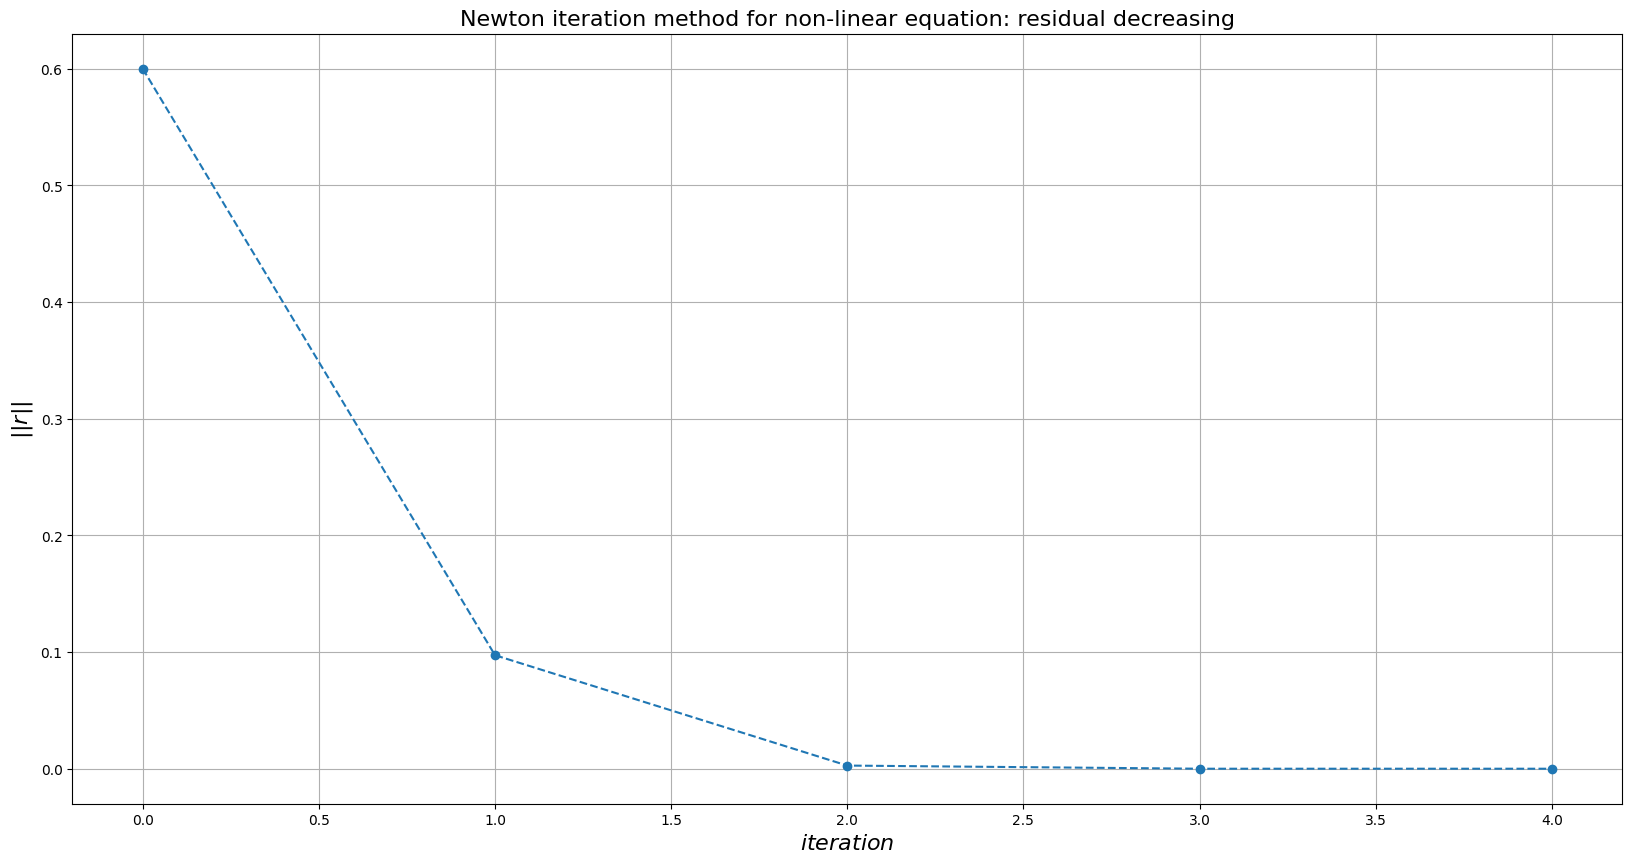

In [40]:
makePlot(rs, "Newton iteration method for non-linear equation: residual decreasing")